In [1]:
import pandas as pd

df = pd.read_csv("Datasets/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [2]:
df.degree.unique()

array(['bachelors', 'masters'], dtype=object)

ONE HOT ENCODING !

In [3]:
df['degree_number'] = df.degree.map({'bachelors':1, 'masters': 2})
df.head(3)

,company,job,degree,salary_more_then_100k,degree_number
0,google,sales executive,bachelors,0,1
1,google,sales executive,masters,0,2
2,google,business manager,bachelors,1,1


In [4]:
df.drop('degree', axis="columns", inplace=True)
df.head(3)

,company,job,salary_more_then_100k,degree_number
0,google,sales executive,0,1
1,google,sales executive,0,2
2,google,business manager,1,1


In [5]:
df_encoded = pd.get_dummies(df, columns=['company', 'job'], drop_first=True)
df_encoded.head()

,salary_more_then_100k,degree_number,company_facebook,company_google,job_computer programmer,job_sales executive
0,0,1,False,True,False,True
1,0,2,False,True,False,True
2,1,1,False,True,False,False
3,1,2,False,True,False,False
4,0,1,False,True,True,False


In [6]:
from sklearn.tree import DecisionTreeClassifier

X = df_encoded.drop('salary_more_then_100k', axis="columns")
y = df_encoded['salary_more_then_100k']

model = DecisionTreeClassifier()
model.fit(X, y)

y_pred = model.predict(X)

from sklearn.metrics import classification_report

report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [7]:
# Optionally, visualize the tree
from sklearn.tree import export_text
print(export_text(model, feature_names=list(X.columns)))

|--- company_facebook <= 0.50
|   |--- job_sales executive <= 0.50
|   |   |--- degree_number <= 1.50
|   |   |   |--- company_google <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- company_google >  0.50
|   |   |   |   |--- job_computer programmer <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- job_computer programmer >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- degree_number >  1.50
|   |   |   |--- class: 1
|   |--- job_sales executive >  0.50
|   |   |--- class: 0
|--- company_facebook >  0.50
|   |--- class: 1



In [8]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="entropy")
model.fit(X, y)

y_pred = model.predict(X)

from sklearn.metrics import classification_report

report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [10]:
X.head(2)

,degree_number,company_facebook,company_google,job_computer programmer,job_sales executive
0,1,False,True,False,True
1,2,False,True,False,True


In [11]:
model.predict([[1, 0, 1, 0, 1]])

c:\Users\SPPL IT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [12]:
model.predict([[2, 0, 1, 1, 0]])

c:\Users\SPPL IT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

### Let's Implement the same code with **Krish Naik** Style

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Datasets/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [18]:
df['degree_number'] = df.degree.map({'bachelors':1, 'masters': 2})

In [19]:
df.drop('degree', axis="columns", inplace=True)

In [20]:
df_encoded = pd.get_dummies(df, columns=['company', 'job'], drop_first=True)

In [21]:
X = df_encoded.drop('salary_more_then_100k', axis="columns")
y = df_encoded['salary_more_then_100k']

In [22]:
## Applying Decision Tree Classifier 

from sklearn.tree import DecisionTreeClassifier
treeclassifer=DecisionTreeClassifier()

In [23]:
treeclassifer.fit(X,y)

DecisionTreeClassifier()

[Text(0.7142857142857143, 0.9166666666666666, 'x[1] <= 0.5\ngini = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(0.5714285714285714, 0.75, 'x[4] <= 0.5\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.6428571428571428, 0.8333333333333333, 'True  '),
 Text(0.42857142857142855, 0.5833333333333334, 'x[0] <= 1.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.2857142857142857, 0.4166666666666667, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.14285714285714285, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.42857142857142855, 0.25, 'x[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2857142857142857, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5714285714285714, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5714285714285714, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.7142857142857143, 0.5833333333333334, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(

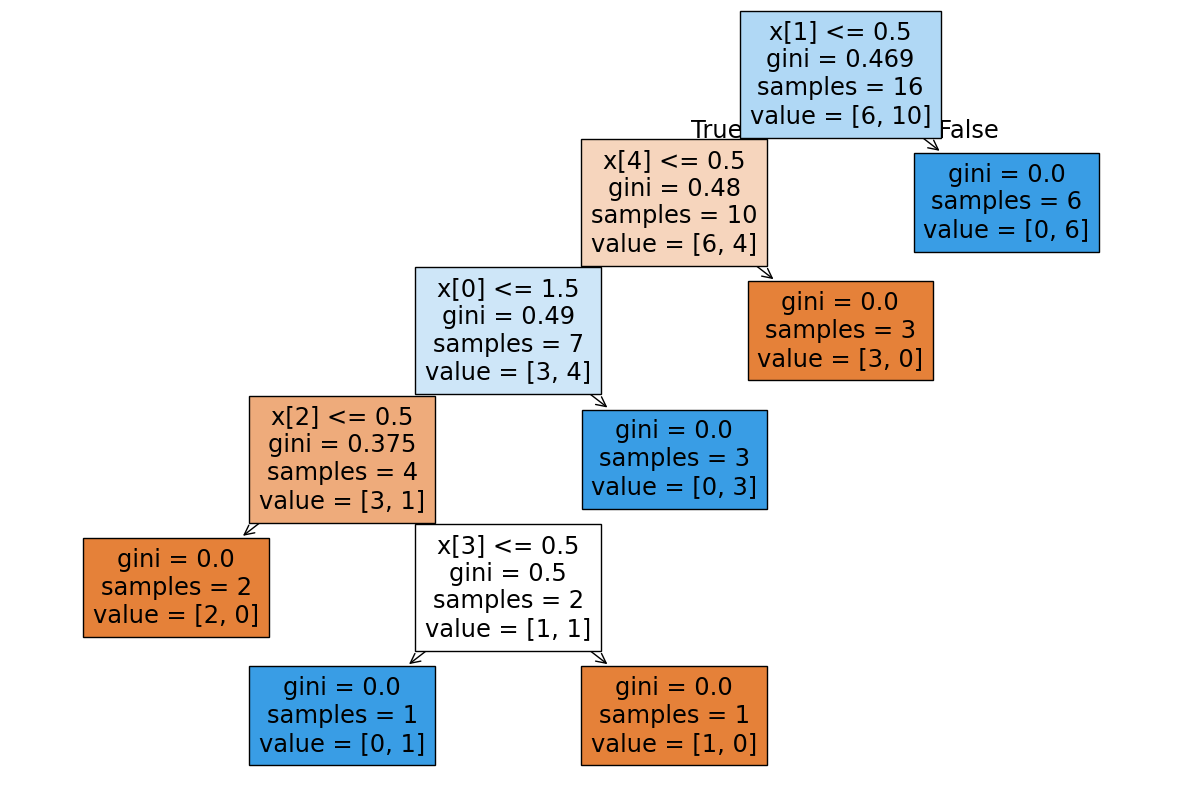

In [24]:
## Visualize The Decision Tree !!

from sklearn import tree 
plt.figure(figsize=(15,10))

tree.plot_tree(treeclassifer,filled=True)

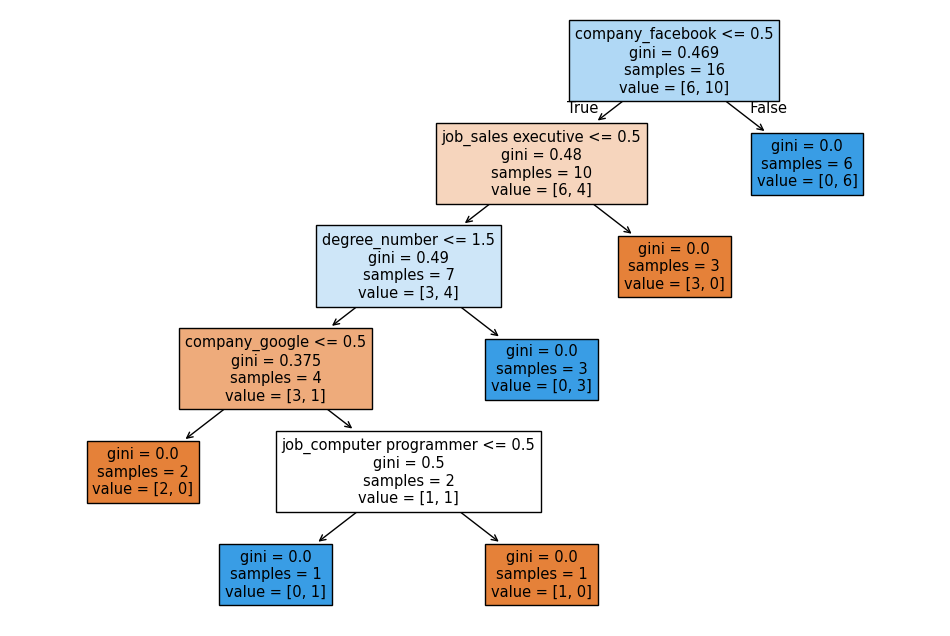

In [30]:
from sklearn import tree

# Plot the decision tree with feature names
plt.figure(figsize=(12,8))
tree.plot_tree(treeclassifer, feature_names=list(X.columns), filled=True)
plt.show()


In [31]:
y_pred=treeclassifer.predict(X)

In [32]:
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        10

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

